In [1]:
import pandas as pd 
import numpy as np 
from preprocessing import DataHandler
from predictors import  log_reg_regularized, NN, random_forest
from analysis import metrics, plot_roc, predictions, combined_probs, kfold_cv
from seaborn import countplot
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, recall_score, precision_score

In [16]:
data_frame = pd.read_csv('Team_Project_doc_data_19/train_test_2019.csv', delimiter=',', header =  0).drop(columns = 'education-num')
dh = DataHandler()

In [17]:
data_frame

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,above
0,18,Private,39302,12th,Never-married,Other-service,Own-child,White,Female,0,0,12,United-States,no
1,63,Local-gov,241404,Some-college,Divorced,Protective-serv,Not-in-family,White,Female,0,0,35,United-States,no
2,38,Self-emp-inc,312232,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,0,0,55,United-States,yes
3,52,Local-gov,230095,Some-college,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,no
4,27,Private,212895,Some-college,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,no
5,67,Self-emp-not-inc,176388,Some-college,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,yes
6,42,Self-emp-not-inc,64631,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,yes
7,18,Private,64253,11th,Never-married,Sales,Own-child,Black,Female,0,0,20,United-States,no
8,47,Federal-gov,218325,Assoc-acdm,Married-civ-spouse,Handlers-cleaners,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,yes
9,25,Private,39640,Some-college,Never-married,Other-service,Not-in-family,White,Male,0,0,48,United-States,no


In [18]:
(X_train, Y_train, X_val, Y_val) = dh.preprocess(data_frame, output_col = -1, standardize = False, train_val_split = 0.8)
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(8000, 102)
(8000,)
(2000, 102)
(2000,)


In [19]:
X_train[0]

array([2.50000e+01, 2.13799e+05, 0.00000e+00, 0.00000e+00, 3.50000e+01,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.000

In [45]:
clf = DecisionTreeClassifier( max_leaf_nodes = 18, criterion = 'gini', splitter = 'random')
clf.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=18,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [41]:
Y_pred[0:25]

array([[0.9676259 , 0.0323741 ],
       [0.9676259 , 0.0323741 ],
       [0.8630394 , 0.1369606 ],
       [0.33258427, 0.66741573],
       [0.79411765, 0.20588235],
       [0.9676259 , 0.0323741 ],
       [0.8630394 , 0.1369606 ],
       [0.67744755, 0.32255245],
       [0.9676259 , 0.0323741 ],
       [0.9676259 , 0.0323741 ],
       [0.67744755, 0.32255245],
       [0.67744755, 0.32255245],
       [0.9676259 , 0.0323741 ],
       [0.9676259 , 0.0323741 ],
       [0.67744755, 0.32255245],
       [0.9676259 , 0.0323741 ],
       [0.67744755, 0.32255245],
       [0.9676259 , 0.0323741 ],
       [0.67744755, 0.32255245],
       [0.9676259 , 0.0323741 ],
       [0.8630394 , 0.1369606 ],
       [0.02597403, 0.97402597],
       [0.33258427, 0.66741573],
       [0.33258427, 0.66741573],
       [0.67744755, 0.32255245]])

In [46]:
Y_pred = clf.predict_proba(X_val)
m = metrics(Y_val, Y_pred[:,1])
for (k,v) in m.items():
    if k != 'roc':
        print(k)
        print(v)


confusion_matrix
[[1407   78]
 [ 280  235]]
p
0.7507987220447284
r
0.4563106796116505
f1
0.567632850241546
acc
0.821
auc
0.8652727926514333


In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(Y_val, Y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87      1485
         1.0       0.62      0.59      0.61       515

    accuracy                           0.80      2000
   macro avg       0.74      0.73      0.74      2000
weighted avg       0.80      0.80      0.80      2000



In [53]:
class dtc:
    def __init__(self, **kwargs):
        self.clf = DecisionTreeClassifier(**kwargs)
        return
    
    def fit_predict(self, X_train, Y_train, X_val):
        self.clf.fit(X_train, Y_train)
        Y_pred = self.clf.predict_proba(X_val)
        return Y_pred[:,1]
    

In [60]:
clf = dtc(max_leaf_nodes = 18, criterion = 'gini', splitter = 'best')

In [61]:
res = kfold_cv(clf, 10, dh, data_frame, data_handler_kwargs = {'standardize':False}, random_seed = 5)

In [79]:
max_nodes = np.arange(2, 100)
auc_1 = []

for mn in max_nodes: 
    print(mn)
    clf = dtc(max_leaf_nodes = mn)
    res = kfold_cv(clf, 10, dh, data_frame, data_handler_kwargs = {'standardize':False}, random_seed = 5)
    auc_1 += [res['totalscores']['auc']]
import matplotlib.pyplot as plt 

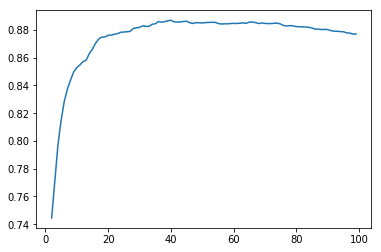

In [80]:
plt.plot(max_nodes, auc_1)

In [98]:
max_depth = np.arange(2, 100)
auc = []

for md in max_nodes: 
    print(md)
    clf = dtc(max_depth = md)
    res = kfold_cv(clf, 10, dh, data_frame, data_handler_kwargs = {'standardize':False}, random_seed = 5)
    auc += [res['totalscores']['auc']]
import matplotlib.pyplot as plt 

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


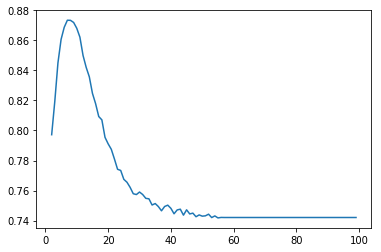

In [83]:
plt.plot(max_nodes, auc)

In [97]:
np.argsort(auc_1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 96, 97, 21, 95, 94, 22, 23, 93, 24, 92, 25, 91, 90,
       89, 88, 86, 87, 84, 85, 26, 83, 27, 28, 82, 81, 80, 79, 78, 31, 30,
       77, 75, 29, 74, 76, 32, 73, 54, 56, 55, 33, 69, 70, 57, 66, 59, 45,
       53, 68, 58, 62, 71, 72, 60, 67, 48, 61, 47, 44, 65, 46, 49, 50, 51,
       52, 35, 63, 40, 64, 41, 39, 34, 36, 42, 43, 37, 38])

In [100]:
mnidx = np.argsort(auc_1)
mdidx = np.argsort(auc)
best_mds = max_depth[mdidx[-10:]]
best_mns = max_nodes[mnidx[-10:]]
auc_res = []
best_auc = 0
best_params = {'md':0, 'mn':0}
i = 0
for md in best_mds:
    for mn in best_mns:
        clf = dtc(max_depth = md, max_leaf_nodes = mn)
        res = kfold_cv(clf, 10, dh, data_frame, data_handler_kwargs = {'standardize':False}, random_seed = 5)
        auc_res = res['totalscores']['auc']
        if auc_res > best_auc:
            best_auc = auc_res
            best_params['md'] = md
            best_params['mn'] = mn
            print('New best auc: ', auc_res)
        print(i)
        i+=1
        

New best auc:  0.8851271033012902
0
1
2
3
New best auc:  0.8852670368872763
4
New best auc:  0.8854037791937047
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [101]:
    alphas = np.linspace(0.001, 0.999, 100)
    f1 = []
    recall = []
    prec = []
    for alpha in alphas:
        Y_bin = [1 if y > alpha else 0 for y in Y_pred]
        f1 += [f1_score(Y_true, Y_bin)]
    best_alpha = alphas[np.argmax(f1)]
    


/Users/rasmushelander/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


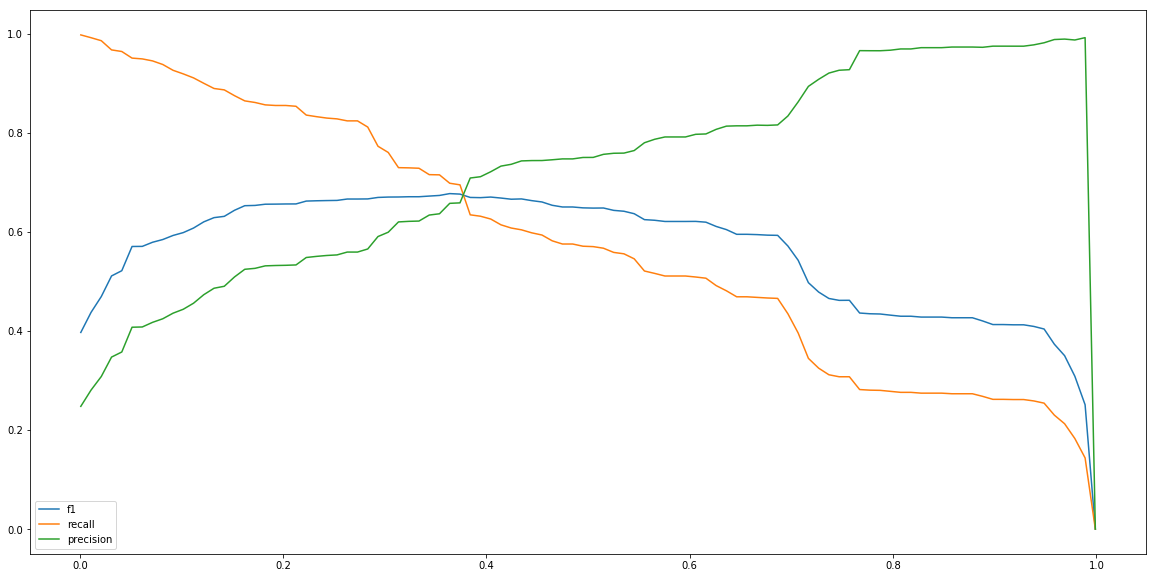

In [107]:
clf = dtc(max_depth = best_params['md'], max_leaf_nodes = best_params['mn'])
res = kfold_cv(clf, 10, dh, data_frame, data_handler_kwargs = {'standardize':False}, random_seed = 5)
alphas = np.linspace(0.001, 0.999, 100)
f1 = []
recall = []
prec = []
Y_true = res['y_true']
Y_pred = res['y_pred']
for alpha in alphas:
    Y_bin = [1 if y > alpha else 0 for y in Y_pred]
    f1 += [f1_score(Y_true, Y_bin)]
    recall += [recall_score(Y_true, Y_bin)]
    prec += [precision_score(Y_true, Y_bin)]
best_alpha = alphas[np.argmax(f1)]



a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)
best_alpha = alphas[np.argmax(f1)]
plt.plot(alphas, f1, label = 'f1', axes = ax)
plt.plot(alphas, recall, label = 'recall')
plt.plot(alphas, prec, label = 'precision')
plt.legend()
plt.savefig('dtc_alphatest.png', bbox_inches = 'tight')

In [108]:
best_alpha

0.3639090909090909

In [109]:
m = metrics(res['y_true'], res['y_pred'], cutoff = best_alpha)

In [110]:
for k,v in m.items():
    if k != 'roc':
        print(k)
        print(v)

confusion_matrix
[[6619  902]
 [ 749 1730]]
p
0.6572948328267477
r
0.6978620411456232
f1
0.6769712385051849
acc
0.8349
auc
0.8854037791937047


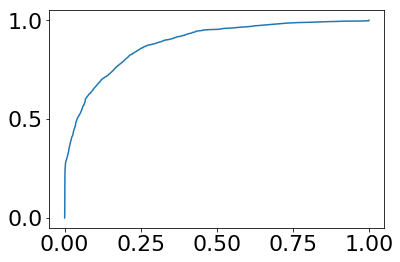

In [133]:
plt.plot(res['totalscores']['roc'][0],res['totalscores']['roc'][1])

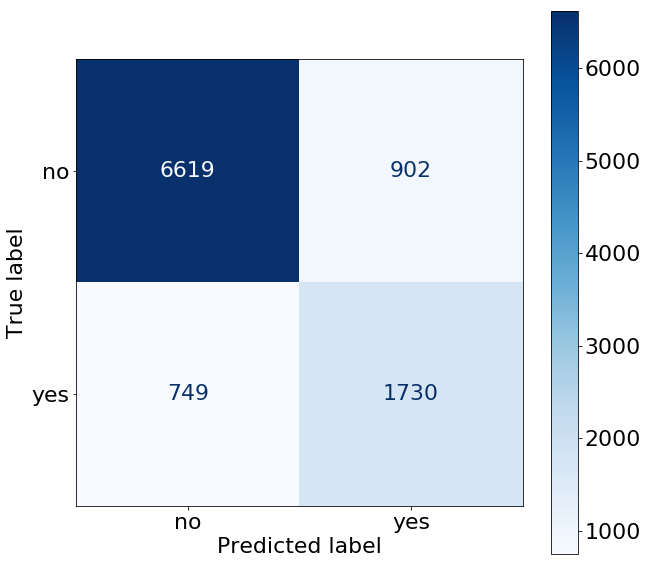

In [114]:
import numpy as np 
cm = np.array([[6606, 915], [684, 1795]])

d = ConfusionMatrixDisplay(m['confusion_matrix'], ['no', 'yes'])

a4_dims = (10, 10)
plt.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(figsize=a4_dims)
d.plot(ax = ax)
plt.savefig('dtc_cm.png', bbox_inches = 'tight')

In [111]:
dh.decode_features()

['age',
 'fnlwgt',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 ' Federal-gov',
 ' Local-gov',
 ' Private',
 ' Self-emp-inc',
 ' Self-emp-not-inc',
 ' State-gov',
 ' Without-pay',
 ' 10th',
 ' 11th',
 ' 12th',
 ' 1st-4th',
 ' 5th-6th',
 ' 7th-8th',
 ' 9th',
 ' Assoc-acdm',
 ' Assoc-voc',
 ' Bachelors',
 ' Doctorate',
 ' HS-grad',
 ' Masters',
 ' Preschool',
 ' Prof-school',
 ' Some-college',
 ' Divorced',
 ' Married-AF-spouse',
 ' Married-civ-spouse',
 ' Married-spouse-absent',
 ' Never-married',
 ' Separated',
 ' Widowed',
 ' Adm-clerical',
 ' Armed-Forces',
 ' Craft-repair',
 ' Exec-managerial',
 ' Farming-fishing',
 ' Handlers-cleaners',
 ' Machine-op-inspct',
 ' Other-service',
 ' Priv-house-serv',
 ' Prof-specialty',
 ' Protective-serv',
 ' Sales',
 ' Tech-support',
 ' Transport-moving',
 ' Husband',
 ' Not-in-family',
 ' Other-relative',
 ' Own-child',
 ' Unmarried',
 ' Wife',
 ' Amer-Indian-Eskimo',
 ' Asian-Pac-Islander',
 ' Black',
 ' Other',
 ' White',
 ' Female',
 '

In [112]:
import numpy as np
from itertools import product
from sklearn.metrics import confusion_matrix
#from sklearn.utils import check_matplotlib_support
from sklearn.base import is_classifier
import matplotlib.pyplot as plt

class ConfusionMatrixDisplay:
    """Confusion Matrix visualization.
    It is recommend to use :func:`~sklearn.metrics.plot_confusion_matrix` to
    create a :class:`ConfusionMatrixDisplay`. All parameters are stored as
    attributes.
    Read more in the :ref:`User Guide <visualizations>`.
    Parameters
    ----------
    confusion_matrix : ndarray of shape (n_classes, n_classes)
        Confusion matrix.
    display_labels : ndarray of shape (n_classes,)
        Display labels for plot.
    Attributes
    ----------
    im_ : matplotlib AxesImage
        Image representing the confusion matrix.
    text_ : ndarray of shape (n_classes, n_classes), dtype=matplotlib Text, \
            or None
        Array of matplotlib axes. `None` if `include_values` is false.
    ax_ : matplotlib Axes
        Axes with confusion matrix.
    figure_ : matplotlib Figure
        Figure containing the confusion matrix.
    """
    def __init__(self, confusion_matrix, display_labels):
        self.confusion_matrix = confusion_matrix
        self.display_labels = display_labels

    def plot(self, include_values=True, cmap=plt.cm.Blues,
             xticks_rotation='horizontal', values_format=None, ax=None):
        """Plot visualization.
        Parameters
        ----------
        include_values : bool, default=True
            Includes values in confusion matrix.
        cmap : str or matplotlib Colormap, default='viridis'
            Colormap recognized by matplotlib.
        xticks_rotation : {'vertical', 'horizontal'} or float, \
                         default='vertical'
            Rotation of xtick labels.
        values_format : str, default=None
            Format specification for values in confusion matrix. If `None`,
            the format specification is '.2f' for a normalized matrix, and
            'd' for a unnormalized matrix.
        ax : matplotlib axes, default=None
            Axes object to plot on. If `None`, a new figure and axes is
            created.
        Returns
        -------
        display : :class:`~sklearn.metrics.ConfusionMatrixDisplay`
        """
        #check_matplotlib_support("ConfusionMatrixDisplay.plot")
        import matplotlib.pyplot as plt
        if ax is None:
            fig, ax = plt.subplots()
        else:
            fig = ax.figure
        

        cm = self.confusion_matrix
        n_classes = cm.shape[0]
        self.im_ = ax.imshow(cm, interpolation='nearest', cmap=cmap)
        self.text_ = None

        cmap_min, cmap_max = self.im_.cmap(0), self.im_.cmap(256)

        if include_values:
            self.text_ = np.empty_like(cm, dtype=object)
            if values_format is None:
                values_format = '.2g'

            # print text with appropriate color depending on background
            thresh = (cm.max() - cm.min()) / 2.
            for i, j in product(range(n_classes), range(n_classes)):
                color = cmap_max if cm[i, j] < thresh else cmap_min
                self.text_[i, j] = ax.text(j, i,
                                           cm[i,j],
                                           ha="center", va="center",
                                           color=color)
        np.set_printoptions(precision=5)

        fig.colorbar(self.im_, ax=ax)
        ax.set(xticks=np.arange(n_classes),
               yticks=np.arange(n_classes),
               xticklabels=self.display_labels,
               yticklabels=self.display_labels,
               ylabel="True label",
               xlabel="Predicted label")

        ax.set_ylim((n_classes - 0.5, -0.5))
        plt.setp(ax.get_xticklabels(), rotation=xticks_rotation)

        self.figure_ = fig
        self.ax_ = ax
        return self
        
        

In [115]:
from sklearn.tree import plot_tree

In [131]:
(X_traint, Y_traint, X_valt, Y_valt) = dh.preprocess(data_frame, output_col = -1, standardize = False, train_val_split = 1)
clf.fit_predict(X_traint, Y_traint, X_val)

array([0.04543, 0.01043, 0.21512, ..., 0.01043, 0.04543, 0.01043])

[Text(1333.96875, 2358.835714285714, ' Married-civ-spouse <= 0.5\ngini = 0.373\nsamples = 10000\nvalue = [7521, 2479]'),
 Text(549.28125, 2184.1071428571427, 'capital-gain <= 7055.5\ngini = 0.126\nsamples = 5338\nvalue = [4976, 362]'),
 Text(470.8125, 2009.3785714285714, 'capital-loss <= 2391.5\ngini = 0.096\nsamples = 5235\nvalue = [4971, 264]'),
 Text(392.34375, 1834.6499999999999, 'hours-per-week <= 45.5\ngini = 0.09\nsamples = 5215\nvalue = [4969, 246]'),
 Text(156.9375, 1659.9214285714284, 'age <= 33.5\ngini = 0.062\nsamples = 4423\nvalue = [4281, 142]'),
 Text(78.46875, 1485.192857142857, 'gini = 0.021\nsamples = 2493\nvalue = [2467, 26]'),
 Text(235.40625, 1485.192857142857, ' Prof-specialty <= 0.5\ngini = 0.113\nsamples = 1930\nvalue = [1814, 116]'),
 Text(156.9375, 1310.4642857142856, 'gini = 0.087\nsamples = 1695\nvalue = [1618, 77]'),
 Text(313.875, 1310.4642857142856, 'gini = 0.277\nsamples = 235\nvalue = [196, 39]'),
 Text(627.75, 1659.9214285714284, ' Prof-school <= 0.5\n

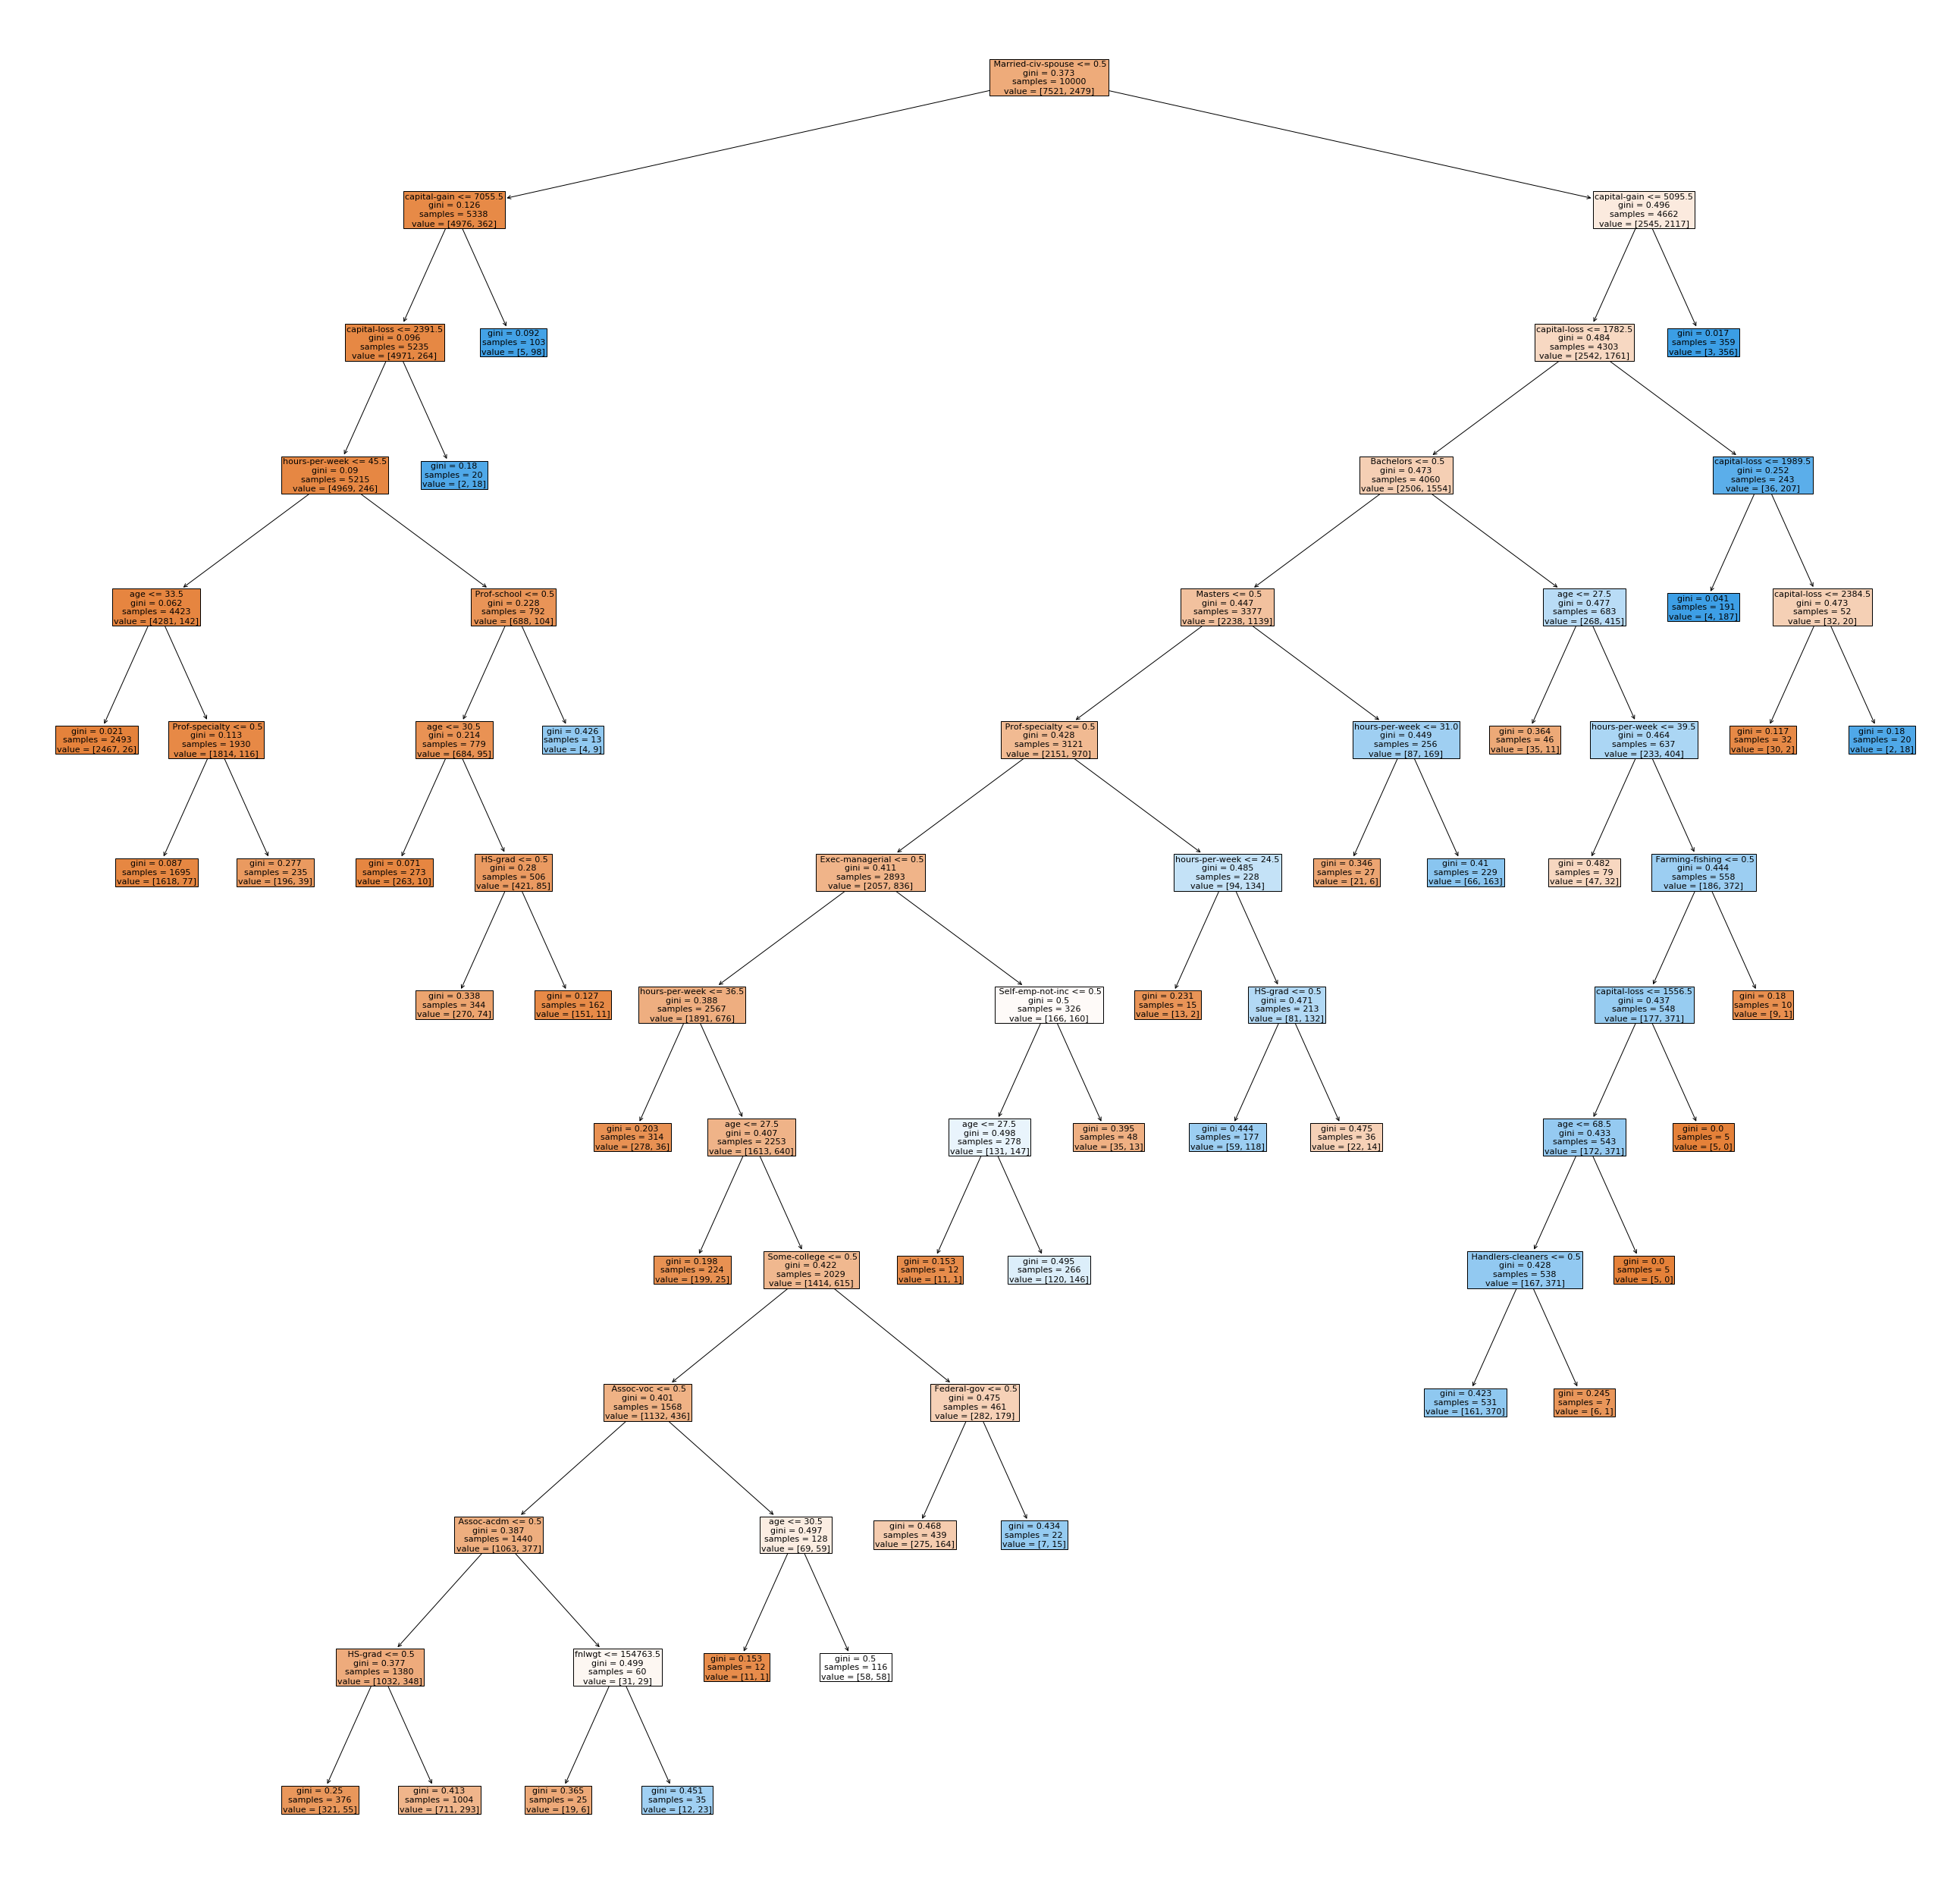

In [132]:
a4_dims = (45, 45)
plt.rcParams.update({'font.size': 22})

fig, ax = plt.subplots(figsize=a4_dims)
#d.plot(ax = ax)
#plt.savefig('dtc_cm.png', bbox_inches = 'tight')
plot_tree(clf.clf, filled = True, ax = ax, feature_names = dh.decode_features())